In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind, f_oneway

In [2]:
data = pd.read_csv("./Joined_Data_2009_2021_cleaned_commonColls_V4")

In [3]:
data = data.drop('Unnamed: 0', axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50664365 entries, 0 to 50664364
Data columns (total 69 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ld_augm     float64
 1   ca_mnsb     float64
 2   mtran       float64
 3   rf_cesarn   float64
 4   me_pres     float64
 5   attend      float64
 6   dob_mm      int64  
 7   ca_disor    float64
 8   rdmeth_rec  float64
 9   ca_anen     float64
 10  ab_surf     float64
 11  ca_limb     float64
 12  ca_cchd     float64
 13  tbo_rec     float64
 14  ab_aven6    float64
 15  pay         float64
 16  illb_r11    float64
 17  ilop_r11    float64
 18  dlmp_yy     float64
 19  dwgt_r      float64
 20  ab_anti     float64
 21  dbwt        float64
 22  ld_chor     float64
 23  me_rout     float64
 24  cig_3       float64
 25  precare     float64
 26  priorterm   float64
 27  ld_ster     float64
 28  bfacil      float64
 29  combgest    float64
 30  itran       float64
 31  meduc       float64
 32  cig_0       float64
 33  lbo_r

/raid/omer_david/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


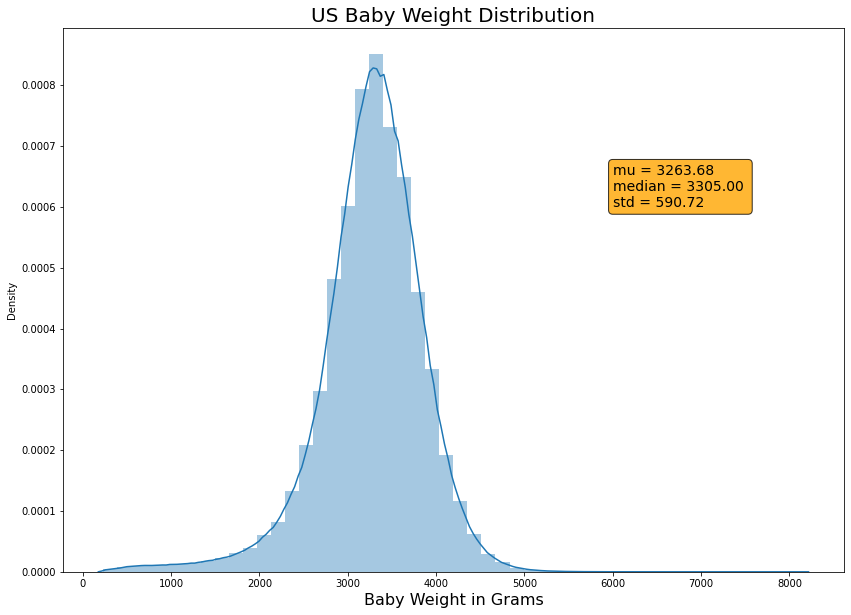

In [5]:
plt.figure(figsize=(14,10))
g = sns.distplot(data['dbwt'])
g.set_xlabel('Baby Weight in Grams', fontsize=16)
g.set_title('US Baby Weight Distribution', fontsize=20)
mu = data['dbwt'].mean()
median = data['dbwt'].median()
std = data['dbwt'].std()

textstr = 'mu = {:.2f} \nmedian = {:.2f} \nstd = {:.2f}'.format(mu, median, std)

props = dict(boxstyle='round', facecolor='orange', alpha = 0.8)
g.text(6000, 0.0006, textstr, fontsize=14, bbox=props)
plt.savefig('WeightDistribution', bbox_inches = 'tight', pad_inches=0.5);

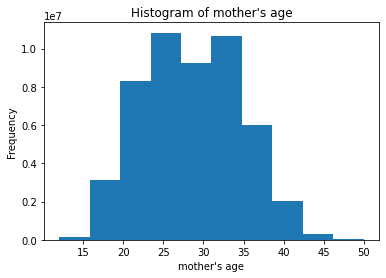

In [6]:
# extract the column and store it in a variable
mother_data = data["mager"]

# use matplotlib to create a histogram of the data
plt.hist(mother_data)

# set title and labels for the plot
plt.title("Histogram of mother's age")
plt.xlabel("mother's age")
plt.ylabel("Frequency")

# display the plot
plt.show()


/raid/omer_david/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

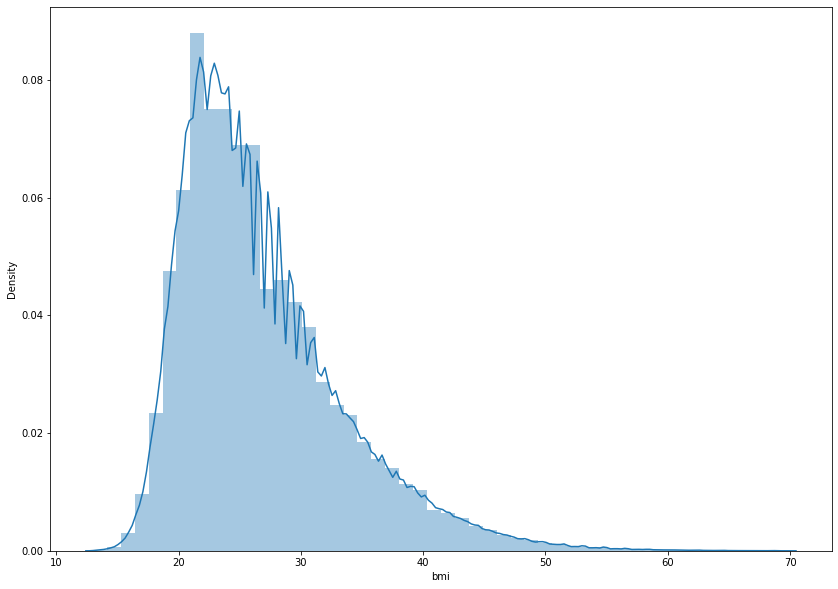

In [7]:
plt.figure(figsize=(14,10))
sns.distplot(data['bmi'])

/raid/omer_david/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/raid/omer_david/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


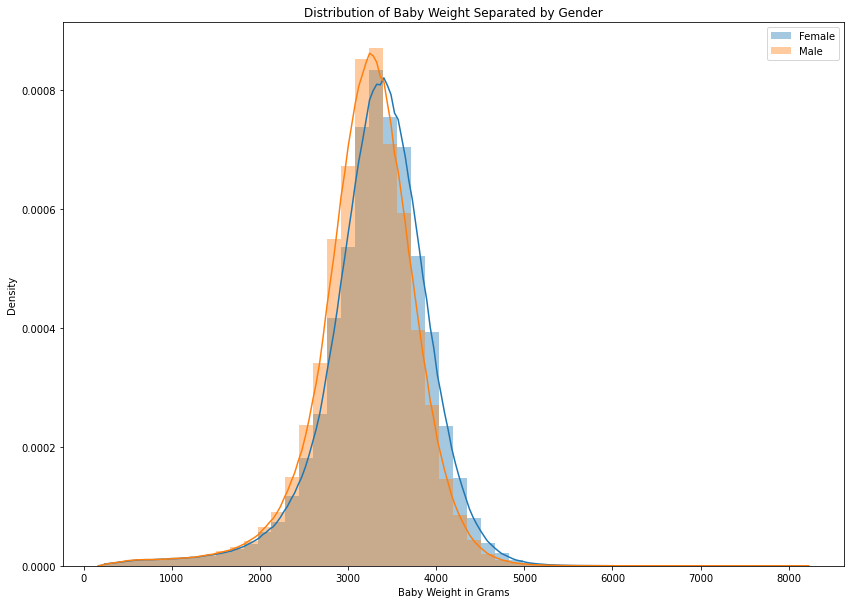

In [8]:
plt.figure(figsize=(14,10))
sns.distplot(data[data['sex'].eq(0)]['dbwt'], label = 'Female')
sns.distplot(data[data['sex'].eq(1)]['dbwt'], label = 'Male')
plt.title('Distribution of Baby Weight Separated by Gender')
plt.xlabel('Baby Weight in Grams')
plt.legend();

/raid/omer_david/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/raid/omer_david/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


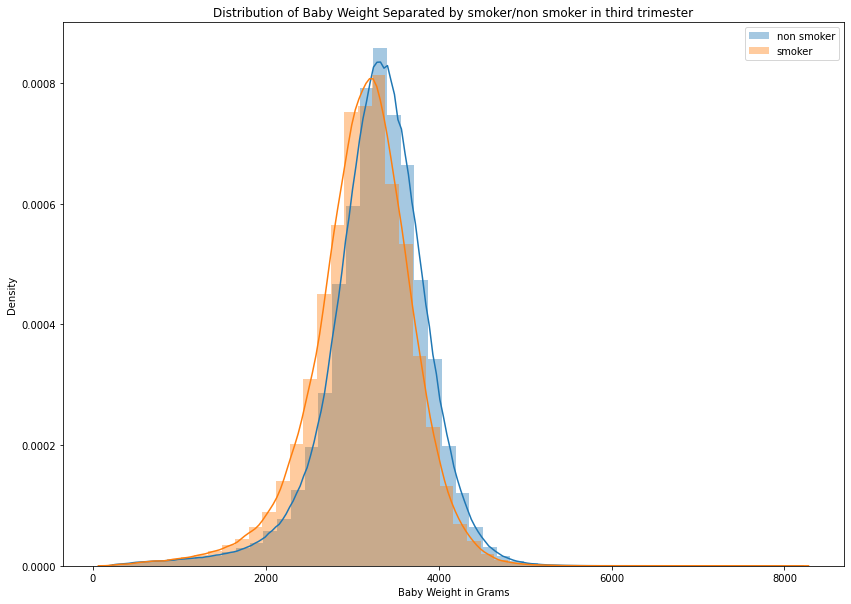

In [9]:
plt.figure(figsize=(14,10))
sns.distplot(data[data['cig_3'].eq(0)]['dbwt'], label = 'non smoker')
sns.distplot(data[data['cig_3'].eq(1)]['dbwt'], label = 'smoker')
plt.title('Distribution of Baby Weight Separated by smoker/non smoker in third trimester')
plt.xlabel('Baby Weight in Grams')
plt.legend();

/raid/omer_david/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/raid/omer_david/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


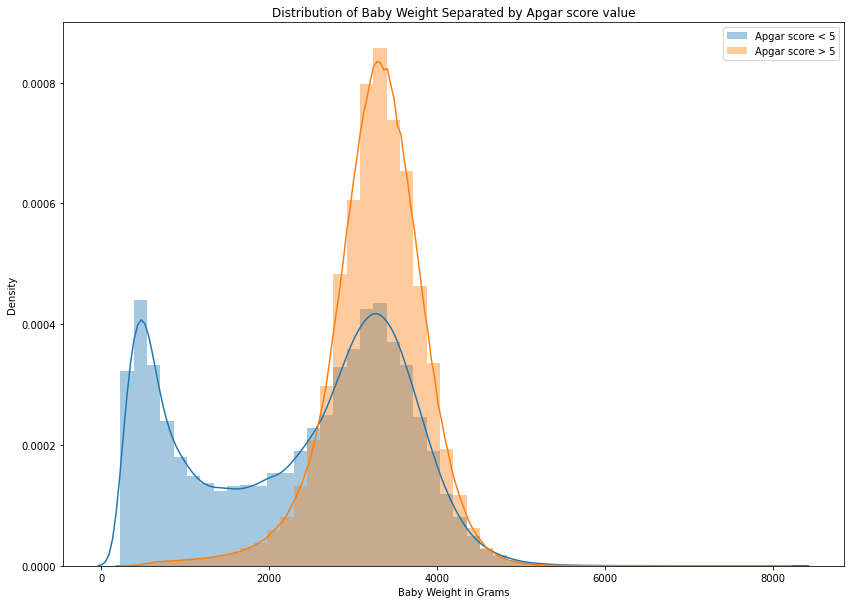

In [10]:
plt.figure(figsize=(14,10))
sns.distplot(data[data['apgar5'].le(5)]['dbwt'], label = 'Apgar score < 5')
sns.distplot(data[data['apgar5'].gt(5)]['dbwt'], label = 'Apgar score > 5')
plt.title('Distribution of Baby Weight Separated by Apgar score value')
plt.xlabel('Baby Weight in Grams')
plt.legend();

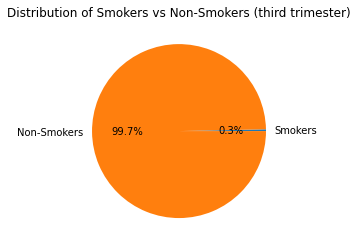

In [11]:
# Count the number of smokers and non-smokers
smokers = data[data['cig_3'] == 1].shape[0]
non_smokers = data[data['cig_3'] == 0].shape[0]

# Create a list of values and labels for the pie chart
values = [smokers, non_smokers]
labels = ['Smokers', 'Non-Smokers']

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Smokers vs Non-Smokers (third trimester)')
plt.show()

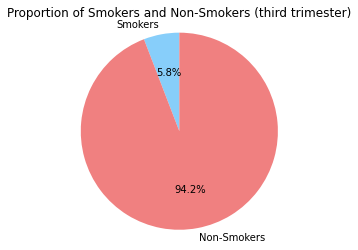

In [12]:
# subset the data for smokers and non-smokers
smokers = data[data['cig_3'] > 0]
non_smokers = data[data['cig_3'] == 0]

# count the number of smokers and non-smokers
smoker_count = len(smokers)
non_smoker_count = len(non_smokers)

# create a pie chart
labels = ['Smokers', 'Non-Smokers']
sizes = [smoker_count, non_smoker_count]
colors = ['lightskyblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of Smokers and Non-Smokers (third trimester)')
plt.show()



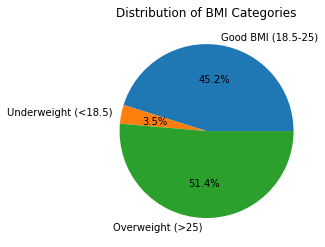

In [13]:
# Define BMI categories
good_bmi = data[(data['bmi'] >= 18.5) & (data['bmi'] <= 25)].shape[0]
underweight = data[data['bmi'] < 18.5].shape[0]
overweight = data[data['bmi'] > 25].shape[0]

# Create a list of values and labels for the pie chart
values = [good_bmi, underweight, overweight]
labels = ['Good BMI (18.5-25)', 'Underweight (<18.5)', 'Overweight (>25)']

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of BMI Categories')
plt.show()


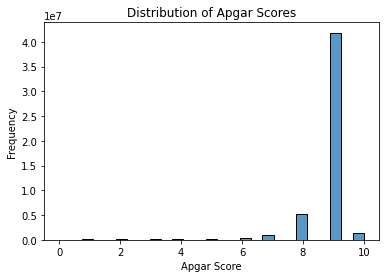

In [14]:
# Create a histogram of the apgar score using seaborn
sns.histplot(data=data, x='apgar5')

# Add axis labels and a plot title
plt.xlabel('Apgar Score')
plt.ylabel('Frequency')
plt.title('Distribution of Apgar Scores')

# Show the plot
plt.show()


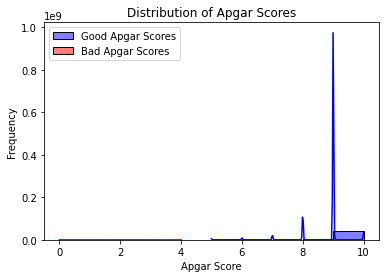

In [15]:
# Separate the data into good and bad apgar scores
good_apgar = data[data['apgar5'] >= 5]
bad_apgar = data[data['apgar5'] < 5]

# Plot the histograms
sns.histplot(good_apgar['apgar5'], kde=True, color='blue', label='Good Apgar Scores',binwidth=1)
sns.histplot(bad_apgar['apgar5'], kde=True, color='red', label='Bad Apgar Scores',binwidth=1)

# Add labels and title
plt.xlabel('Apgar Score')
plt.ylabel('Frequency')
plt.title('Distribution of Apgar Scores')

# Add legend
plt.legend()

# Show the plot
plt.show()


STATISTIC TESTS

In [16]:
age_apgar = data[['mager', 'apgar5']]
low_apgar = age_apgar[age_apgar['apgar5'] < 5]
high_apgar = age_apgar[age_apgar['apgar5'] >= 5]


t, p = ttest_ind(low_apgar['mager'], high_apgar['mager'])
print(f"t-statistic: {t:.2f}, p-value: {p:.5f}")

f, p = f_oneway(low_apgar['mager'], high_apgar['mager'])
print(f"F-statistic: {f:.2f}, p-value: {p:.5f}")

t-statistic: -48.10, p-value: 0.00000
F-statistic: 2313.47, p-value: 0.00000


In [17]:
mean_low_apgar = low_apgar['mager'].mean()
mean_high_apgar = high_apgar['mager'].mean()

print(f"Mean age of mothers with low Apgar score: {mean_low_apgar:.2f}")
print(f"Mean age of mothers with high Apgar score: {mean_high_apgar:.2f}")


Mean age of mothers with low Apgar score: 28.03
Mean age of mothers with high Apgar score: 28.47


The results of the t-test and ANOVA for the new cutoff of Apgar score (less than 5 vs. 5 or higher) indicate that there is still a significant difference in the age of the mother between the two groups. The t-statistic and F-statistic are both larger than those in the previous analysis, which suggests that the difference in age is even more pronounced when using a lower Apgar score cutoff.

The negative t-statistic indicates that the mean age of mothers in the low Apgar score group (less than 5) is lower than that in the high Apgar score group (5 or higher). The p-values for both tests are less than 0.05, which indicates that the difference in age between the groups is statistically significant.

Overall, these results support the idea that age of the mother may be a factor affecting Apgar score, and that this effect may be even more pronounced when considering a lower cutoff for Apgar score.

In [18]:
data.dropna(subset=['bmi'], inplace=True)
data.dropna(subset=['apgar5'], inplace=True)


In [19]:
age_apgar = data[['bmi', 'apgar5']]
low_apgar = age_apgar[age_apgar['apgar5'] < 5]
high_apgar = age_apgar[age_apgar['apgar5'] >= 5]


t, p = ttest_ind(low_apgar['bmi'], high_apgar['bmi'])
print(f"t-statistic: {t:.2f}, p-value: {p:.5f}")

f, p = f_oneway(low_apgar['bmi'], high_apgar['bmi'])
print(f"F-statistic: {f:.2f}, p-value: {p:.5f}")

t-statistic: 134.25, p-value: 0.00000
F-statistic: 18023.49, p-value: 0.00000


In [20]:
low_mean = low_apgar['bmi'].mean()
high_mean = high_apgar['bmi'].mean()

print(f"Low apgar BMI mean: {low_mean:.2f}")
print(f"High apgar BMI mean: {high_mean:.2f}")

t, p = ttest_ind(low_apgar['bmi'], high_apgar['bmi'])
print(f"t-statistic: {t:.2f}, p-value: {p:.5f}")

f, p = f_oneway(low_apgar['bmi'], high_apgar['bmi'])
print(f"F-statistic: {f:.2f}, p-value: {p:.5f}")

Low apgar BMI mean: 28.26
High apgar BMI mean: 26.80
t-statistic: 134.25, p-value: 0.00000
F-statistic: 18023.49, p-value: 0.00000


In [21]:
low_apgar_median = low_apgar['bmi'].median()
high_apgar_median = high_apgar['bmi'].median()

print(f"Low apgar group median BMI: {low_apgar_median:.2f}")
print(f"High apgar group median BMI: {high_apgar_median:.2f}")


Low apgar group median BMI: 26.60
High apgar group median BMI: 25.20


The results of the t-test and ANOVA for the relationship between BMI and Apgar score indicate that there is a statistically significant difference in the BMI of mothers between the low and high Apgar score groups. The t-statistic and F-statistic are both large, with p-values less than 0.05, which indicates that the difference in BMI between the groups is highly statistically significant.

The positive t-statistic indicates that the mean BMI of mothers in the low Apgar score group (less than 5) is higher than that in the high Apgar score group (5 or higher). This suggests that higher maternal BMI may be associated with lower Apgar scores.

Overall, these results suggest that maternal BMI may be an important factor to consider when evaluating the risk of low Apgar score. However, it's important to note that correlation does not necessarily imply causation, and further research would be needed to determine the exact nature of the relationship between BMI and Apgar score.

In [22]:
data.dropna(subset=['cig_3'], inplace=True)


In [23]:
age_apgar = data[['cig_3', 'apgar5']]
low_apgar = age_apgar[age_apgar['apgar5'] < 5]
high_apgar = age_apgar[age_apgar['apgar5'] >= 5]


t, p = ttest_ind(low_apgar['cig_3'], high_apgar['cig_3'])
print(f"t-statistic: {t:.2f}, p-value: {p:.5f}")

f, p = f_oneway(low_apgar['cig_3'], high_apgar['cig_3'])
print(f"F-statistic: {f:.2f}, p-value: {p:.5f}")

t-statistic: 40.65, p-value: 0.00000
F-statistic: 1652.63, p-value: 0.00000


In [24]:
low_apgar_mean = low_apgar['cig_3'].mean()
high_apgar_mean = high_apgar['cig_3'].mean()

print(f"Low Apgar mean: {low_apgar_mean:.2f}")
print(f"High Apgar mean: {high_apgar_mean:.2f}")


Low Apgar mean: 0.71
High Apgar mean: 0.51


The results of the t-test and ANOVA for the relationship between smoking during pregnancy (measured by cig_rec) and Apgar score indicate that there is a statistically significant difference in smoking habits of mothers between the low and high Apgar score groups. The t-statistic and F-statistic are both large, with p-values less than 0.05, which indicates that the difference in smoking habits between the groups is highly statistically significant.

The positive t-statistic indicates that mothers in the low Apgar score group (less than 5) smoked more cigarettes during pregnancy compared to the high Apgar score group (5 or higher). This suggests that smoking during pregnancy may be associated with lower Apgar scores.

Overall, these results suggest that smoking during pregnancy may be an important factor to consider when evaluating the risk of low Apgar score. However, it's important to note that correlation does not necessarily imply causation, and further research would be needed to determine the exact nature of the relationship between smoking during pregnancy and Apgar score.